In [5]:
from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [12]:
print(X_train[0], y_train[0])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# first we fit the scaler on the training dataset
scaler.fit(X_train)

# then we call the transform method to scale both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# a sample output
print(X_train_scaled[0])



[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ] 15.2
[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [8]:
from keras import models, layers
model = models.Sequential()


In [9]:
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(16, activation='relu'))

# output layer
model.add(layers.Dense(1))

In [10]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


In [13]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)


Epoch 1/100
11/11 [==============================] - 0s 13ms/step - loss: 581.4124 - mae: 22.2466 - val_loss: 649.0148 - val_mae: 23.6947
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 571.1955 - mae: 22.0408 - val_loss: 639.6026 - val_mae: 23.5178
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 562.9634 - mae: 21.8755 - val_loss: 630.0235 - val_mae: 23.3391
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 554.6519 - mae: 21.7065 - val_loss: 620.8564 - val_mae: 23.1657
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 546.5287 - mae: 21.5386 - val_loss: 611.2543 - val_mae: 22.9819
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 537.7896 - mae: 21.3570 - val_loss: 601.4392 - val_mae: 22.7900
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 528.4802 - mae: 21.1666 - val_loss: 590.2175 - val_mae: 22.5679
Epoch 8/100
11/11 [=====================

11/11 [==============================] - 0s 2ms/step - loss: 25.3606 - mae: 3.7576 - val_loss: 26.1869 - val_mae: 3.8801
Epoch 60/100
11/11 [==============================] - 0s 2ms/step - loss: 25.1211 - mae: 3.6900 - val_loss: 25.9571 - val_mae: 3.8798
Epoch 61/100
11/11 [==============================] - 0s 2ms/step - loss: 24.6707 - mae: 3.6800 - val_loss: 25.5618 - val_mae: 3.8375
Epoch 62/100
11/11 [==============================] - 0s 2ms/step - loss: 24.4496 - mae: 3.6625 - val_loss: 25.1155 - val_mae: 3.7916
Epoch 63/100
11/11 [==============================] - 0s 2ms/step - loss: 24.0134 - mae: 3.5931 - val_loss: 24.6907 - val_mae: 3.7572
Epoch 64/100
11/11 [==============================] - 0s 2ms/step - loss: 23.7578 - mae: 3.5667 - val_loss: 24.4169 - val_mae: 3.7190
Epoch 65/100
11/11 [==============================] - 0s 2ms/step - loss: 23.4866 - mae: 3.5269 - val_loss: 24.0821 - val_mae: 3.7041
Epoch 66/100
11/11 [==============================] - 0s 2ms/step - loss: 2

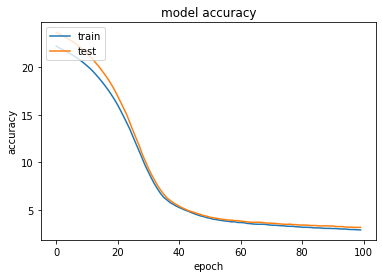

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

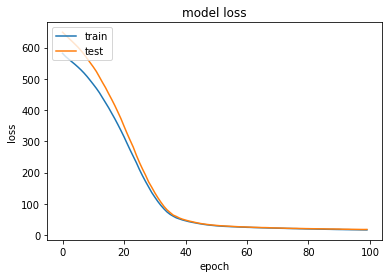

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
model.evaluate(X_test_scaled, y_test)


4/4 [==============================] - 0s 735us/step - loss: 26.4845 - mae: 3.7170


[26.484512329101562, 3.7170188426971436]

In [19]:
#Prediction 
# we get a sample data (the first 2 inputs from the training data)
to_predict = X_train_scaled[:2]
# we call the predict method
predictions = model.predict(to_predict)
# print the predictions
print(predictions)
# output
# array([[13.272537], [39.808475]], dtype=float32)
# print the real values
print(y_train[:2])
# array([15.2, 42.3])

[[13.321173]
 [40.16096 ]]
[15.2 42.3]
